<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')

In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.279105,33.294789,98.213132,0.000092,193.787118,193.787779,-0.000660
1,0.0,1.0,27.307392,41.573326,82.168421,-0.002289,161.046850,161.049179,-0.002329
2,0.0,2.0,99.287516,97.719183,39.175324,-0.000039,246.181985,246.181655,0.000330
3,0.0,3.0,70.721573,53.467880,42.478189,-0.001441,176.666201,176.667483,-0.001281
4,0.0,4.0,90.132872,75.537285,73.216941,0.000912,248.888010,248.887439,0.000572
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.370226,63.654966,46.022169,0.000358,214.047720,214.045421,0.002299
19996,999.0,16.0,68.846111,22.658485,86.742943,0.001794,188.249333,188.248727,0.000607
19997,999.0,17.0,97.444221,21.081859,95.757670,0.005498,224.289249,224.284748,0.004501
19998,999.0,18.0,75.949360,70.073804,47.160659,-0.000965,203.182857,203.182474,0.000383


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,52.279105,33.294789,98.213132,0.000092,193.787118,193.787779,-0.000660
1,0.0,1.0,27.307392,41.573326,82.168421,-0.002289,161.046850,161.049179,-0.002329
2,0.0,2.0,99.287516,97.719183,39.175324,-0.000039,246.181985,246.181655,0.000330
3,0.0,3.0,70.721573,53.467880,42.478189,-0.001441,176.666201,176.667483,-0.001281
4,0.0,4.0,90.132872,75.537285,73.216941,0.000912,248.888010,248.887439,0.000572
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,94.370226,63.654966,46.022169,0.000358,214.047720,214.045421,0.002299
19996,999.0,16.0,68.846111,22.658485,86.742943,0.001794,188.249333,188.248727,0.000607
19997,999.0,17.0,97.444221,21.081859,95.757670,0.005498,224.289249,224.284748,0.004501
19998,999.0,18.0,75.949360,70.073804,47.160659,-0.000965,203.182857,203.182474,0.000383


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    52.279105  33.294789  98.213132  ...  193.787118  193.787779 -0.000660
      1.0    27.307392  41.573326  82.168421  ...  161.046850  161.049179 -0.002329
      2.0    99.287516  97.719183  39.175324  ...  246.181985  246.181655  0.000330
      3.0    70.721573  53.467880  42.478189  ...  176.666201  176.667483 -0.001281
      4.0    90.132872  75.537285  73.216941  ...  248.888010  248.887439  0.000572
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   94.370226  63.654966  46.022169  ...  214.047720  214.045421  0.002299
      16.0   68.846111  22.658485  86.742943  ...  188.249333  188.248727  0.000607
      17.0   97.444221  21.081859  95.757670  ...  224.289249  224.284748  0.004501
      18.0   75.949360  70.073804  47.160659  ...  203.182857  203.182474  0.000383
      19.0   44.722222  33.169060  55.132803  ...  143.027089  143.023927  0.003162

[20000 rows x 7 columns]

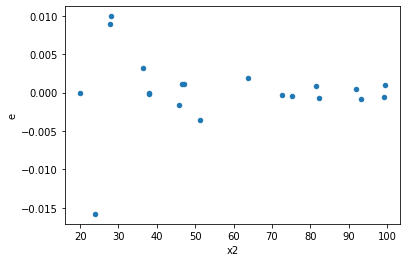

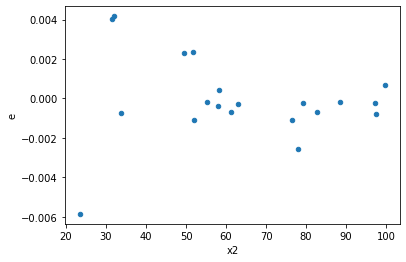

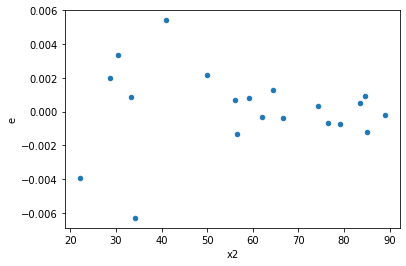

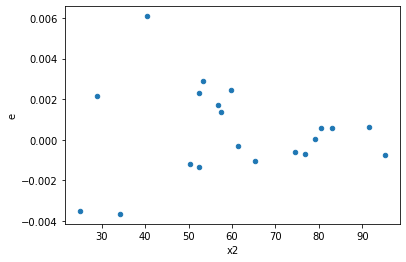

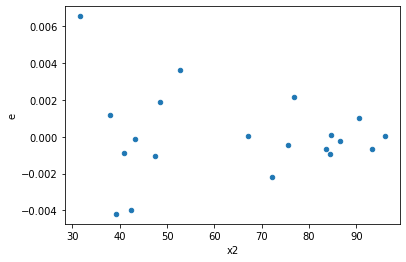

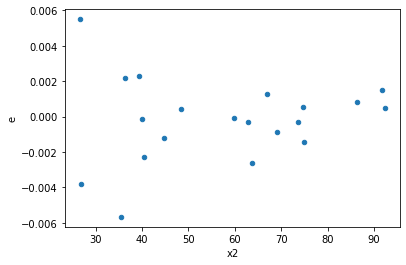

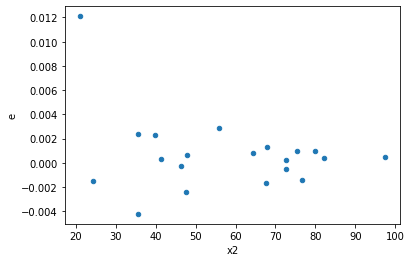

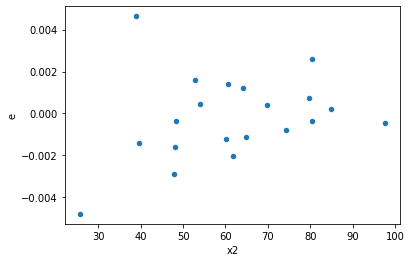

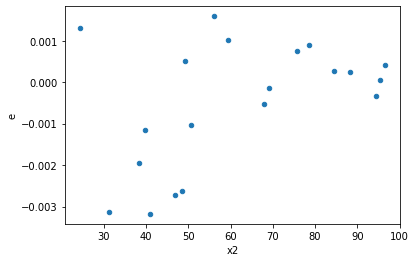

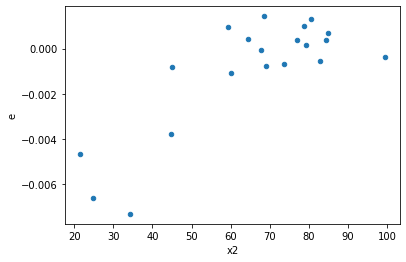

In [ ]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,8.0,6.0,3.0736098294088802e-06,9.731417899938618e-05,3.8420122867611003e-07,1.621902983323103e-05,42.21493483797269,0.000204525057377003,0.9998977374713115,0.0001022625286885015,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,1.7064200126488224e-06,5.780253068918229e-05,2.437742875212603e-07,8.2575043841689e-06,33.873565863457756,0.00014058460116261884,0.9999297076994187,7.029230058130942e-05,Reject005=0 : Heteroscedasticity
8.0,10.0,4.0,9.26290941456213e-06,9.851679246344171e-06,9.26290941456213e-07,2.4629198115860428e-06,2.658905211481514,0.3586367791793894,0.8206816104103053,0.1793183895896947,Reject005=1 : Homoscedasticity
10.0,5.0,9.0,1.761976268088289e-06,0.00030370798789408377,3.523952536176578e-07,3.374533198823153e-05,95.75989359052089,3.183957610897181e-07,0.9999998408021195,1.5919788054485906e-07,Reject005=0 : Heteroscedasticity
11.0,10.0,4.0,1.4307224901522482e-05,3.8092232289685324e-05,1.4307224901522482e-06,9.523058072421331e-06,6.656118246528681,0.08273509485275854,0.9586324525736207,0.04136754742637927,Reject005=1 : Homoscedasticity
15.0,11.0,3.0,6.826946966035497e-05,2.285021501190558e-05,6.206315423668633e-06,7.61673833730186e-06,1.2272560798721874,0.9758921873209561,0.512053906339522,0.48794609366047803,Reject005=1 : Homoscedasticity
16.0,5.0,9.0,1.6072337917550913e-05,6.691809169149282e-05,3.2144675835101825e-06,7.435343521276979e-06,2.3130871063747427,0.2592881089006773,0.8703559455496613,0.12964405445033866,Reject005=1 : Homoscedasticity
17.0,4.0,10.0,6.0758515361402645e-06,5.783179244352894e-05,1.5189628840350661e-06,5.783179244352894e-06,3.8073209721820866,0.07862023439031973,0.9606898828048401,0.039310117195159866,Reject005=1 : Homoscedasticity
18.0,10.0,4.0,5.8604486588143815e-06,4.505999872952866e-06,5.860448658814381e-07,1.1264999682382164e-06,1.9222077247343667,0.5534587269553999,0.7232706365223001,0.27672936347769994,Reject005=1 : Homoscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,5.165485776399033e-05,4.697948990841871e-05,7.379265394855762e-06,6.711355701202673e-06,0.9094883219515723,0.9036160749255372,Reject005=1 : Homoscedasticity
1.0,7.0,7.0,1.2112648081222074e-05,6.128793677006915e-06,1.730378297317439e-06,8.755419538581306e-07,0.5059829721717273,0.38879164336612726,Reject005=1 : Homoscedasticity
2.0,5.0,9.0,1.8234171649869918e-05,2.9998008227487796e-05,3.6468343299739836e-06,3.333112025276422e-06,0.9139740727679835,0.97369896453647,Reject005=1 : Homoscedasticity
3.0,8.0,6.0,3.0736098294088802e-06,9.731417899938618e-05,3.8420122867611003e-07,1.621902983323103e-05,42.21493483797269,0.000204525057377003,Reject005=0 : Heteroscedasticity
4.0,6.0,8.0,0.0002911557229535345,5.682463925753501e-06,4.852595382558909e-05,7.103079907191876e-07,0.01463769250723357,4.997899623835133e-05,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,1.7064200126488224e-06,5.780253068918229e-05,2.437742875212603e-07,8.2575043841689e-06,33.873565863457756,0.00014058460116261884,Reject005=0 : Heteroscedasticity
6.0,9.0,5.0,0.00010341168095508331,1.021482601500206e-05,1.1490186772787035e-05,2.042965203000412e-06,0.17780086985521426,0.025290404623256754,Reject005=0 : Heteroscedasticity
7.0,6.0,8.0,4.12709515045897e-05,3.926647796486778e-05,6.878491917431617e-06,4.908309745608472e-06,0.7135735281115518,0.7002252140504235,Reject005=1 : Homoscedasticity
8.0,10.0,4.0,9.26290941456213e-06,9.851679246344171e-06,9.26290941456213e-07,2.4629198115860428e-06,2.658905211481514,0.3586367791793894,Reject005=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      507
Reject005=0 : Heteroscedasticity    493
Name: Result_test, dtype: int64